In [9]:
# Chapter Appendix A

# import Pkg

# Pkg.add("Plots")

# Pkg.add("Optim")

# Pkg.add("StatsKit")

# Pkg.add("CSV")

# Pkg.add("GLM")

# Pkg.add("DataFrames")

# Pkg.add("StatsPlots")

# Pkg.add("StatFiles")

# Pkg.add("NLSolversBase")

# Pkg.add("Distributions")

using Random
using Statistics
using Plots
using Optim
using NLSolversBase 
using StatsKit 
using CSV 
using GLM 
using DataFrames
using LinearAlgebra
using StatsPlots
using StatFiles
using Distributions


In [10]:
# A.1

# A.2

# A.2.1

# A.2.2

rng = MersenneTwister(123456789)

N = 10

μ = -3

σ = 5

x = randn!(rng, zeros(N)).*σ .+ μ

dens_x = kde(x)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(-17.808550905230426:0.014978250415445128:12.85192769518575, [1.7130021099244497e-5, 1.7175844202597934e-5, 1.723237863491406e-5, 1.729965596497518e-5, 1.737771272519728e-5, 1.7466590425431472e-5, 1.756633556794507e-5, 1.767699966390146e-5, 1.7798639251151438e-5, 1.793131591330821e-5  …  1.7257496308542455e-5, 1.719685751902587e-5, 1.7146885313709388e-5, 1.7107562084284537e-5, 1.7078875122514942e-5, 1.7060816620689855e-5, 1.7053383673279075e-5, 1.7056578279918628e-5, 1.7070407349811865e-5, 1.7094882707380113e-5])

In [11]:
mean(x)

std(x)

4.183555619659812

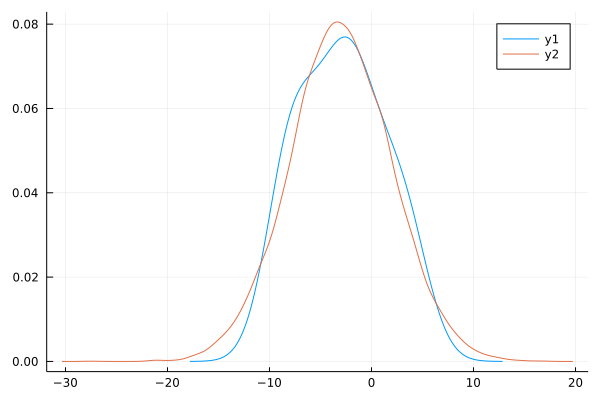

In [12]:
plot(dens_x)

plot!(kde(randn!(rng, zeros(10000)).*σ .+ μ))

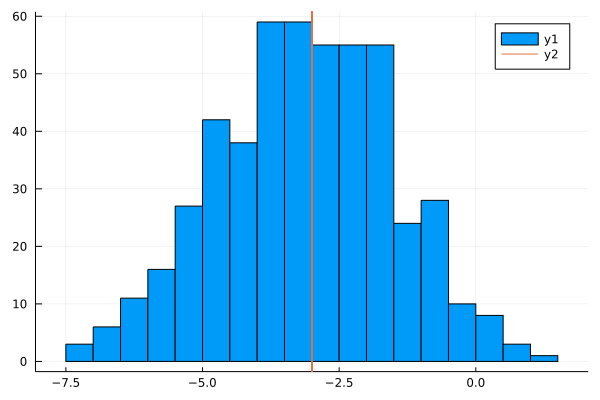

In [13]:
# A.2.3: Many Imaginary Samples
rng = MersenneTwister(123456789)

M = 500

sample_est = zeros(M,N)

for m = 1:M
    sample_est[m,1:end] = randn!(rng, zeros(N)).*σ .+ μ
end

means = zeros(M)
for m = 1:M
    means[m] = mean(sample_est[m,1:end])
end

histogram(means)
vline!(fill(-3,M))

In [14]:
# A.2.4 : Law of Large Numbers

rng = MersenneTwister(123456789)
N = 100000
x = randn!(rng, zeros(N)).*σ .+ μ
mean(x)

-2.995483102287131

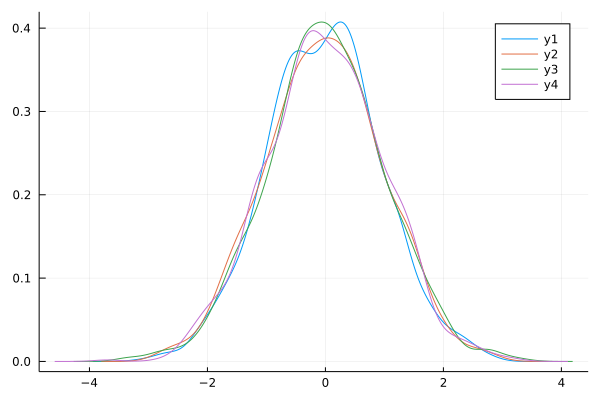

In [15]:
# A.2.4: Central Limit Theorem

rng = MersenneTwister(123456789)
M = 1000
sample_means = zeros(M,4)

for m = 1:M
    sample_means[m,1] = mean(randn!(rng,zeros(10)).*σ .+ μ)
    sample_means[m,2] = mean(randn!(rng,zeros(100)).*σ .+ μ)
    sample_means[m,3] = mean(randn!(rng,zeros(1000)).*σ .+ μ)
    sample_means[m,4] = mean(randn!(rng,zeros(10000)).*σ .+ μ)
end

plot(kde((sample_means[1:end,1].-μ).*(√9/σ)))
plot!(kde((sample_means[1:end,2].-μ).*(√99/σ)))
plot!(kde((sample_means[1:end,3].-μ).*(√999/σ)))
plot!(kde((sample_means[1:end,4].-μ).*(√9999/σ)))

# Note from Chris: He has adjusted for degrees of freedom


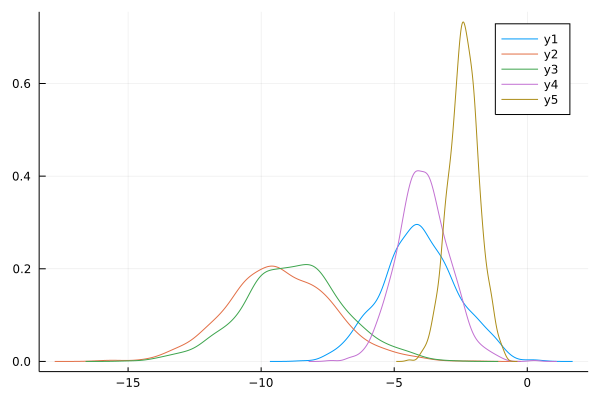

In [16]:
# A.2.6: Approximation of the Limiting Distribution

# A.2.7: Simulation of Approximate Distributions

rng = MersenneTwister(123456789)
M = 5
N = 10
sample_means = zeros(M,2)
for m = 1:M
    x₁ = randn!(rng, zeros(N)).*σ .+ μ
    sample_means[m,1:end] = [mean(x₁); std(x₁)/(√(N-1))]
end

plot(kde((randn!(rng, zeros(1000)).+sample_means[1,1]).*sample_means[1,2]))
plot!(kde((randn!(rng, zeros(1000)).+sample_means[2,1]).*sample_means[2,2]))
plot!(kde((randn!(rng, zeros(1000)).+sample_means[3,1]).*sample_means[3,2]))
plot!(kde((randn!(rng, zeros(1000)).+sample_means[4,1]).*sample_means[4,2]))
plot!(kde((randn!(rng, zeros(1000)).+sample_means[5,1]).*sample_means[5,2]))

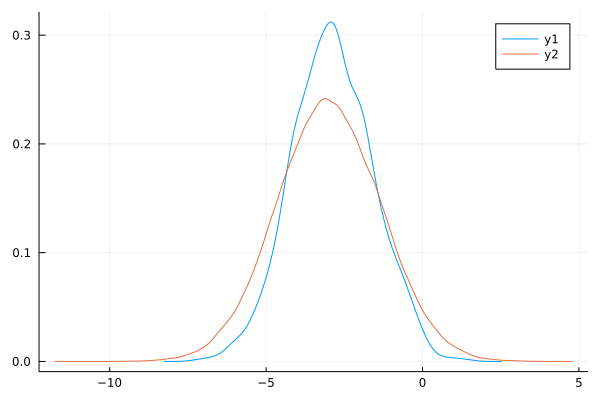

In [17]:
# A.2.8: Bootstrap

rng = MersenneTwister(123456789)

Random.seed!(123456789)

N = 10
x₁ = randn!(rng, zeros(N)).*σ .+ μ
M = 1000

bs_mean = zeros(M)

for m =  1:M
    bs_mean[m] = mean(rand(x₁, N))
end

plot(kde(bs_mean))
plot!(kde(randn!(rng,zeros(100000)).*(σ/√(N-1)) .+ μ))


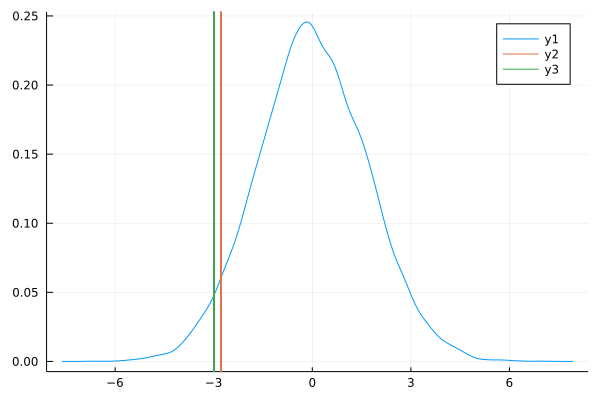

In [18]:
# A.2.9: Hypothesis Testing

rng = MersenneTwister(123456789)
α = 0.05
cr = std(x).*quantile(randn!(rng,zeros(10000)),α)./√9

plot(kde(randn!(rng,zeros(10000)).*(std(x)/√9)))
vline!(fill(cr,10))
vline!(fill(mean(x),10))


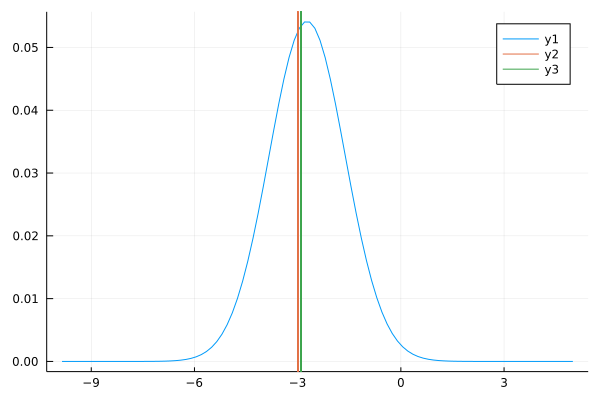

In [19]:
# Bayesian statistics
# A.3.3. Determining the posterior

logϕ = function(z)
    -z.^2 - √π
end

log_norm = function(x,μ,σ)
    z = (x .- μ)./σ
    sum( logϕ.(z) .- log(σ) )
end

# Define θ ∈ Θ, likelihood of observing sample x given true parameters h(x|θ), and prior distribution g(θ)
Θ = ((1:100).*15)./100 .- 10
g = (1:100)./100
h = []

for i = 1:100
    h = [h; log_norm(x₁, Θ[i], 5)]
end

# Posterior distribution
γ = exp.( h .+ log.(g) )./sum( exp.(h .+ log.(g)) )

plot(Θ,γ)
vline!(fill(-3,100))
vline!(fill(mean(x₁),100))

# Bayesian approach makes very strong assumptions about what information available to the econometrician
# Strong assumption about things that the econometrician does not know

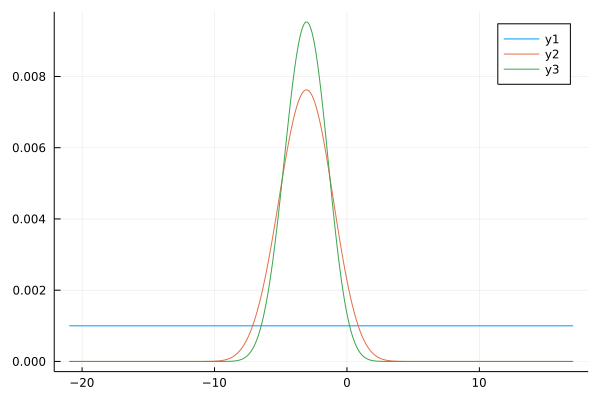

In [20]:
# A.4.: Empirical Bayesian Estimation
# In panel data, think ∀ time series ∀ individual → separate but related sample
# In auction, think ∀ auction as a sample of bids from a large number of related samples
# Instead of assuming prior, the data would provide an estimate of the prior

# A.4.3: Solving for the prior
Θ = (maximum(sample_est) - minimum(sample_est)).*((1:1000)./1000) .+ minimum(sample_est)
H = zeros(500,1000)

for i = 1:500
    x = sample_est[i,1:end]
    for j = 1:1000
        H[i,j] = log_norm(x, Θ[j],5)
    end
end

# Starting point for estimating the prior
g₀ = fill(1/1000, 1000)
log_G0 = log.(zeros(500,1000).+1/1000)
γ₀ = exp.(H + log_G0)
for i = 1:500
    γ₀[i,1:end] = γ₀[i,1:end]./sum(γ₀[i,1:end])
end

# Now get the new estimate of the prior
g₁ = []
for i = 1:1000
    g₁ = [g₁; sum(γ₀[1:end,i])]
end
g₁ = g₁./sum(g₁)

log_G1 = log.(g₁)
for i = 2:500
    log_G1 = hcat(log_G1, log.(g₁)) 
end

γ₁ = exp.(H + log_G1')
for i = 1:500
    γ₁[i,1:end] = γ₁[i,1:end]./sum(γ₁[i,1:end])
end

# Second iteration of the estimate of the prior
g₂ = []
for i = 1:1000
    g₂ = [g₂; sum(γ₁[1:end,i])]
end
g₂ = g₂./sum(g₂)

plot(Θ, g₀)
plot!(Θ, g₁)
plot!(Θ,g₂)

0.10192303450703627
0.05783452952739636
0.03590174965571229
0.02340194450479429
0.01572362470543283
0.010837828496638417
0.007736895041665479
0.005834395695013035
0.005189747873997417
0.004978599199617312
0.004894197352386679
0.004839714198308465
0.004783620278423464
0.004710284674814602
0.004623317055059293
0.004524865886226861
0.004414985624999488
0.004299590672760515
0.004180886833533309
0.00406046654395874
0.003940007919316575
0.003821847026903809
0.003706169907429308
0.003593277894548934
0.0034845020808252367
0.0033794076353265675
0.00327802399802385
0.0031807110047245694
0.0030875206010457603
0.0029988892686297385
0.002914328848613967
0.0028331730656610695
0.002755301383494578
0.00268058373951632
0.00260888517966285
0.002540716426257
0.0024754590542088264
0.0024127600622473756
0.0023526781074230257
0.002295143705239611
0.002239781050746039
0.0021864812924675564
0.0021353363057164338
0.002086381152645543
0.002039383372872308
0.0019940285469290642
0.0019502366434261827
0.0019079322

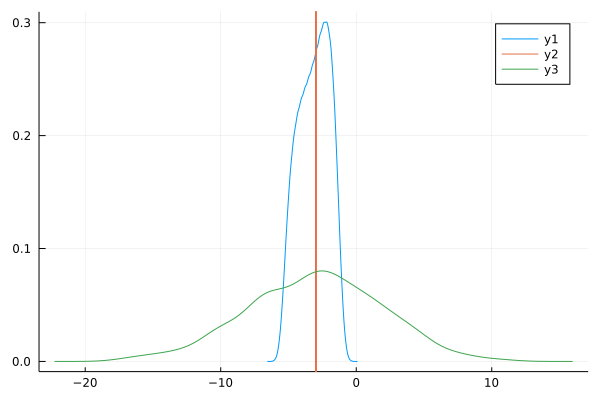

In [21]:
ϵ = 1e-3 # small number
g_old = g₁
g_new = g₂

diff = sum(abs.(g_old - g_new))

while diff > ϵ
    g_old = g_new
    log_G = log.(g_old)
    for i = 2:500
        log_G = hcat(log_G, log.(g_old))
    end
    
    γ = exp.(H + log_G')
    for i = 1:500
        γ[i,1:end] = γ[i,1:end]./sum(γ[i,1:end])
    end
    
    g_new = []
    for i = 1:1000
        g_new = [g_new; sum(γ[1:end,i])]
    end
    
    g_new = g_new./sum(g_new)
    diff = sum(abs.(g_old - g_new))
    println(diff)
end

μ_est = []
for i = 1:500
    μ_est = [μ_est; mean(sample_est[i])]
end

J = 100000
g_dist = []
for i = 1:1000
    if round(J*g_new[i]) > 0
        g_dist = [g_dist; fill(Θ[i], Int(round(J*g_new[i])))]
    end
end

plot(density(g_dist))
vline!(fill(-3,100))
plot!(density!(μ_est))

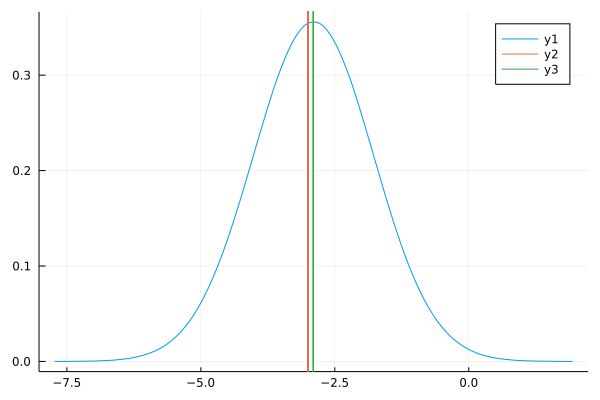

In [22]:
# A.4.4: Estimating the Posterior of the mean

h_x1 = []
for i = 1:1000
    h_x1 = [h_x1; log_norm(x₁, Θ[i], 5)]
end

γ_x1 = ( exp.(h_x1 + g_new) )./sum(exp.(h_x1 + g_new))

J = 100000
g_dist_x1 = []
for i = 1:1000
    g_dist_x1 = [g_dist_x1; fill(Θ[i], Int(round(J*γ_x1[i])))]
end

plot(density(g_dist_x1))
vline!(fill(-3,100))
vline!(fill(mean(x₁),100))

In [23]:
# A.5
# A.5.2: Uniform Prior

log_bin = function(N, p̂, p)
   K = Int(round(p̂*N))
   return log(binomial(big(N), big(K))) + K*log(p) + (N-K)*log(1 - p)
end

Θ = (1:999)./1000
log_g = fill(log(1/1000), 999)

h_jp = []
for i = 1:999
   h_jp = [h_jp; log_bin(3, 1, Θ[i])]
end

γ_jp = exp.(h_jp + log_g)./sum(exp.(h_jp + log_g))

J = 100000
γ_dist_jp = []
for i = 1:999
   γ_dist_jp = [γ_dist_jp; fill(i, Int(round(J*γ_jp[i])))]
end



In [24]:
γ_jp'*Θ

0.7995997331998665289845725663232720276675866055462982490201754045452789864334809

In [25]:
sum(γ_jp[342:999])

0.9863720668776884984431337847330192743472843656089805170394003799184786256944829

In [26]:
# A.5.3: Estimating the prior
M = 1000
# path = "C:/Users/Regi Kusumaatmadja/Dropbox/My PC (MSI)/Downloads/"
x = CSV.read(string("C:/Users/Regi Kusumaatmadja/Dropbox/My PC (MSI)/Downloads","/batave.csv"))

# data set created from Lahman's data

H = zeros(M,999)
for m = 1:M
    for i = 1:999
        H[m,i] = log_bin(x.AB[m], x.AVE[m], Θ[i])
    end
#     println(m)
end

log_G = fill(log(1/1000),M,999)
γ₀ = exp.(H + log_G)
for m = 1:M
    γ₀[m, 1:end] = γ₀[m,1:end]./sum(γ₀[m,1:end])
end

g₁ = []
for i = 1:999
    g₁ = [g₁; sum(γ₀[1:end,1])]
end
g₁ = g₁/sum(g₁)

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(source::String) at CSV.jl:46
└ @ CSV C:\Users\Regi Kusumaatmadja\.julia\packages\CSV\UIgP3\src\CSV.jl:46


999-element Vector{Float64}:
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 ⋮
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956
 0.0010010010010009956

In [27]:
ϵ = 0.001
g_old = exp.(log_g)
g_new = g₁
diff = sum(abs.(g_new - g_old))

while diff > ϵ
   g_old = g_new
   log_G = log.(g_old)
   for i = 2:M
       log_G = hcat(log_G, log.(g_old))
   end

   Γ = exp.(H + log_G')
   for m = 1:M
       Γ[m,1:end] = Γ[m,1:end]./sum(Γ[m, 1:end])
   end

   g_new = []
   for i = 1:999
       g_new = [g_new; sum(Γ[1:end,i])]
   end

   g_new = g_new./sum(g_new)
   diff = sum(abs.(g_old - g_new))
   println(diff)

end



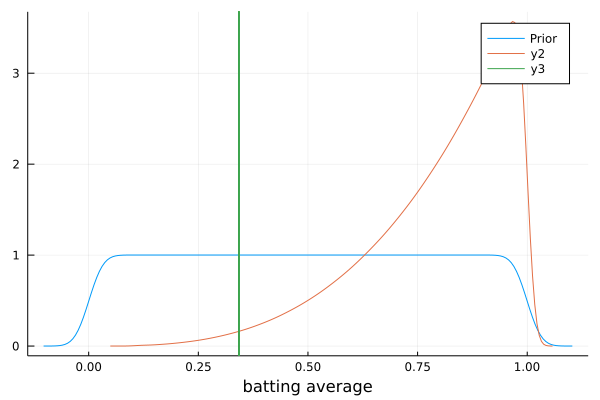

In [28]:
# A.5.4

γ_jp2 = exp.(h_jp + log.(g_new))
γ_jp2 = γ_jp2./sum(γ_jp2)

J = 100000
g_dist_mlb = []
for i = 1:999
   g_dist_mlb = [g_dist_mlb; fill(Θ[i], Int(round(J*g_new[i])))]
end

γ_dist_jp2 = []
for i = 1:999
   γ_dist_jp2 = [γ_dist_jp2; fill(Θ[i], Int(round(J*γ_jp2[i])))]
end


# mean
γ_jp2'*Θ

sum(γ_jp2[342:999])

plot(density(g_dist_mlb), label="Prior")
plot!(density!(γ_dist_jp2), label="JPs Posterior")
vline!(fill(0.342, 100))
xlabel!("batting average")

